In [2]:
%matplotlib notebook
from astropy.io import fits as pyfits
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

import numpy as np
from donutlib.PointMesh import PointMesh
from donutlib.donutana import donutana
import pickle


In [3]:
# use 20140212s2/284601
# just ran donutana jobs on this sequence
pickleFileName = "/nfs/slac/g/ki/ki06/roodman/Donuts/20140212s2/284601/v21/donutana_284601-v21i1.pickle"
anaDict = pickle.load(open(pickleFileName))

In [4]:
# array of dz 
dzArr = anaDict[284601]['z4ResultDict']['deltaArrayAfter']
dz5Arr = anaDict[284601]['z5ResultDict']['deltaArrayAfter']
dz6Arr = anaDict[284601]['z6ResultDict']['deltaArrayAfter']
dz7Arr = anaDict[284601]['z7ResultDict']['deltaArrayAfter']
dz8Arr = anaDict[284601]['z8ResultDict']['deltaArrayAfter']
xArr = anaDict[284601]['z4ResultDict']['deltaArrayX']
yArr = anaDict[284601]['z4ResultDict']['deltaArrayY']
neleMesh = anaDict[284601]['neleMesh']
chi2Mesh = anaDict[284601]['chi2Mesh']

In [5]:
x,y,nele = neleMesh.getXYZpoints() # order is the same as the Arrays above!
lognele = np.log10(nele)
x,y,chi2 = chi2Mesh.getXYZpoints() # order is the same as the Arrays above!

checkX = xArr - x
print np.min(checkX),np.max(checkX)

0.0 0.0


In [6]:
print xArr[0:10],xArr[-10:]
print xArr.shape
print anaDict[284601].keys()

[-28.5555 -16.2405  -7.1055 -15.8955 -27.3255 -27.8355 -26.6505  -9.0855
 -29.8005 -22.8405] [ 174.0255  185.5605  177.2355  195.3405  175.5855  189.4755  188.0505
  194.3355  176.2305  181.4055]
(6392,)
['rzeroMesh', 'z4Mesh', 'z5Mesh', 'z4ResultDict', 'dodyErr', 'dodzErr', 'chi2Mesh', 'doyt', 'z9Mesh', 'rzeroResultDict', 'z8Mesh', 'z9ResultDict', 'z10ResultDict', 'z6ResultDict', 'dodxErr', 'z6Mesh', 'canvas', 'z7ResultDict', 'donut_summary', 'doxtErr', 'z14Mesh', 'doxt', 'z8ResultDict', 'z10Mesh', 'z7Mesh', 'doytErr', 'neleMesh', 'z11Mesh', 'z15Mesh', 'dodz', 'dody', 'dodx', 'z5ResultDict']


<IPython.core.display.Javascript object>


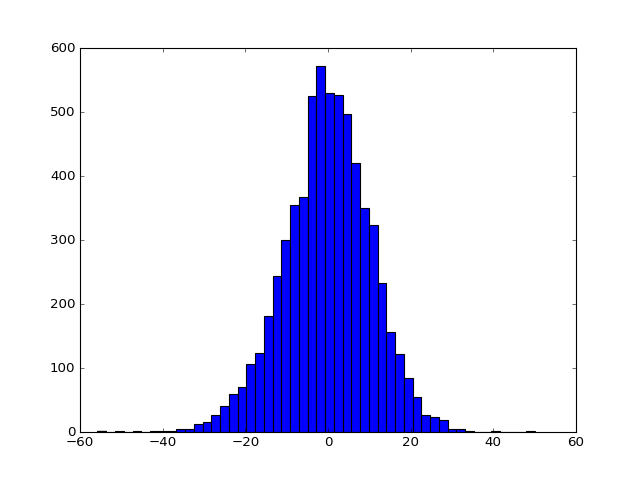

RMS =  10.5116319182


In [7]:
f = plt.figure()
h = plt.hist(dzArr,bins=50)
print "RMS = ",np.std(dzArr)

<IPython.core.display.Javascript object>


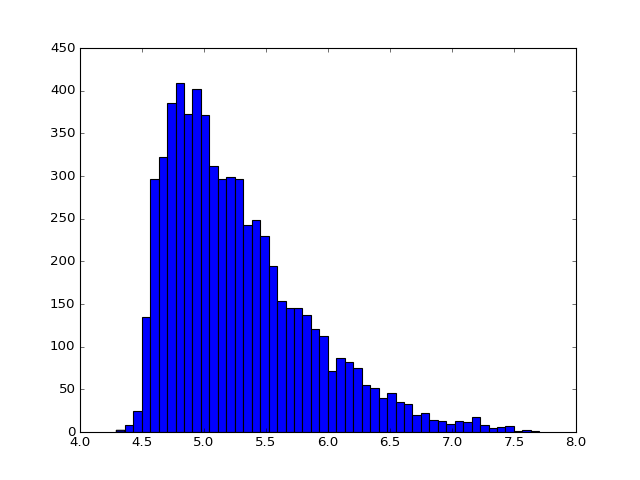

RMS =  2292115.35802


In [8]:
f = plt.figure()
h = plt.hist(np.log10(nele),bins=50)
print "RMS = ",np.std(nele)

<IPython.core.display.Javascript object>


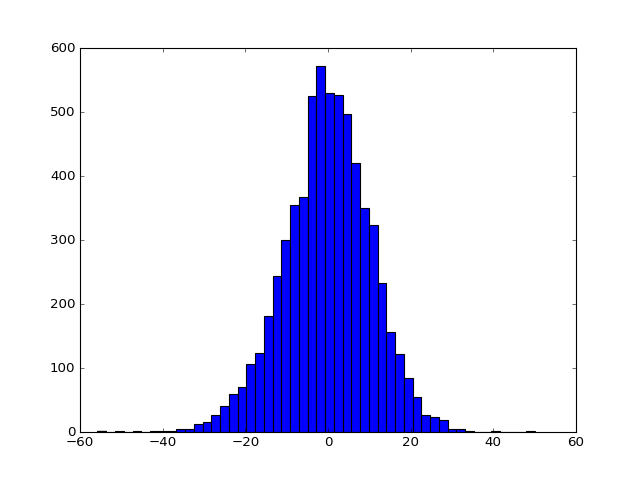

RMS =  10.5116319182


In [9]:
f = plt.figure()
h = plt.hist(dzArr,bins=50)
print "RMS = ",np.std(dzArr)

<IPython.core.display.Javascript object>


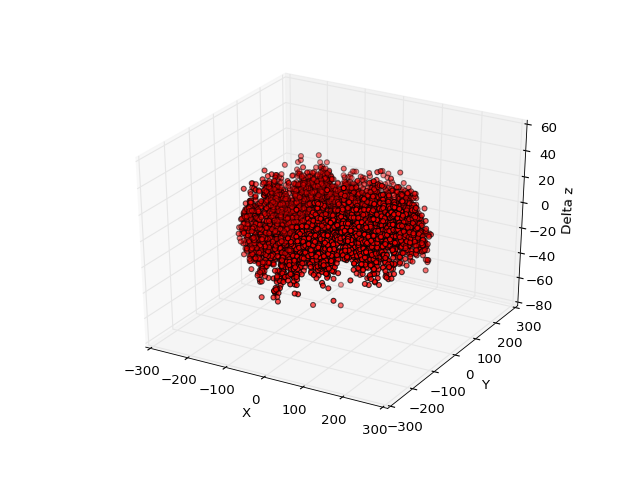

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xArr,yArr, dzArr, c='r', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Delta z')



<IPython.core.display.Javascript object>


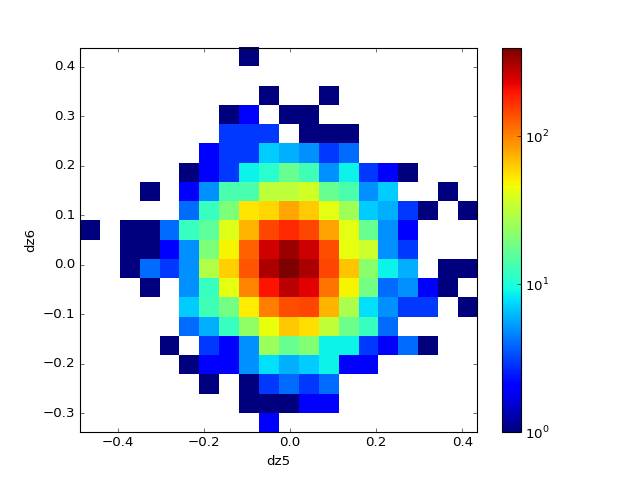

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

im = plt.hist2d(dz5Arr,dz6Arr,bins=(20,20),norm=LogNorm())

ax.set_xlabel('dz5')
ax.set_ylabel('dz6')
plt.colorbar()



<IPython.core.display.Javascript object>


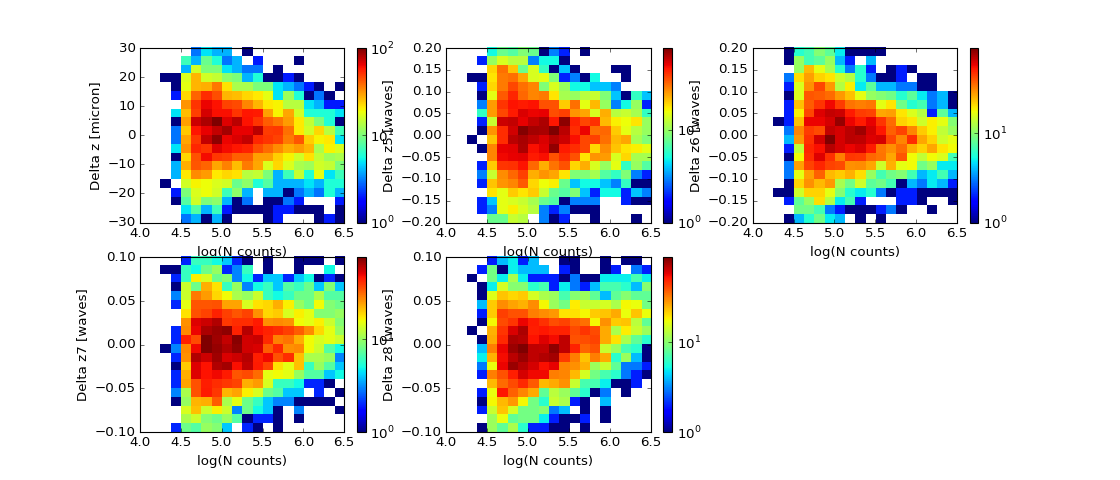

In [12]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(231)

im = plt.hist2d(lognele,dzArr,bins=(20,20),range=[[4.0,6.5],[-30,30]],norm=LogNorm())
ax.set_xlabel('log(N counts)')
ax.set_ylabel('Delta z [micron]')
plt.colorbar()

ax = fig.add_subplot(232)

im = plt.hist2d(lognele,dz5Arr,bins=(20,20),range=[[4.0,6.5],[-0.2,0.2]],norm=LogNorm())
ax.set_xlabel('log(N counts)')
ax.set_ylabel('Delta z5 [waves]')
plt.colorbar()


ax = fig.add_subplot(233)

im = plt.hist2d(lognele,dz6Arr,bins=(20,20),range=[[4.0,6.5],[-0.2,0.2]],norm=LogNorm())
ax.set_xlabel('log(N counts)')
ax.set_ylabel('Delta z6 [waves]')
plt.colorbar()

ax = fig.add_subplot(234)

im = plt.hist2d(lognele,dz7Arr,bins=(20,20),range=[[4.0,6.5],[-0.1,0.1]],norm=LogNorm())
ax.set_xlabel('log(N counts)')
ax.set_ylabel('Delta z7 [waves]')
plt.colorbar()

ax = fig.add_subplot(235)

im = plt.hist2d(lognele,dz8Arr,bins=(20,20),range=[[4.0,6.5],[-0.1,0.1]],norm=LogNorm())
ax.set_xlabel('log(N counts)')
ax.set_ylabel('Delta z8 [waves]')
plt.colorbar()


<IPython.core.display.Javascript object>


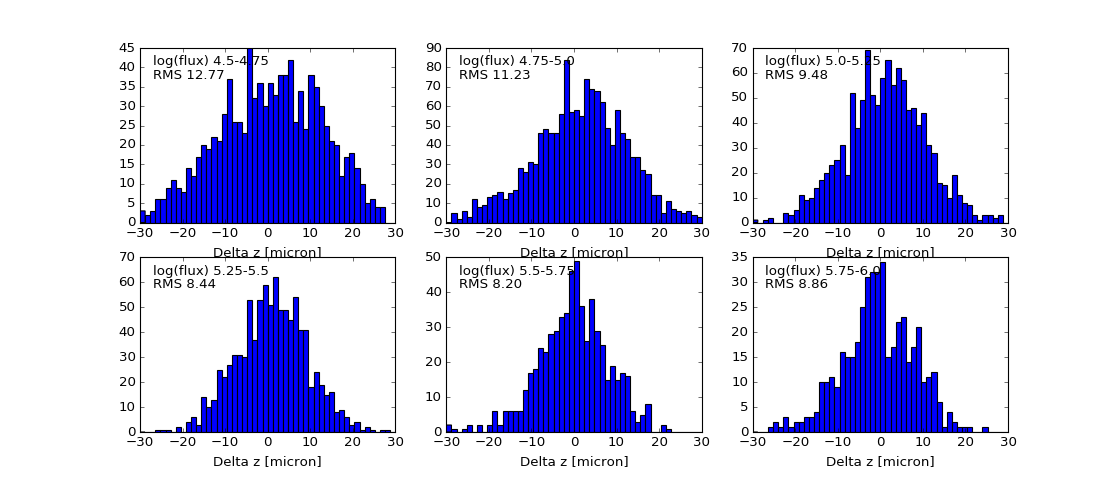

In [22]:
fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(231)
ok = (lognele>=4.5) & (lognele<4.75)
im = plt.hist(dzArr[ok],bins=50,range=[-30,30])
ax.set_xlabel('Delta z [micron]')
ax.text(0.05,0.825,'RMS %.2f' % (np.std(dzArr[ok])),transform=ax.transAxes)
ax.text(0.05,0.9,'log(flux) 4.5-4.75',transform=ax.transAxes)

ax = fig.add_subplot(232)
ok = (lognele>=4.75) & (lognele<5.0)
im = plt.hist(dzArr[ok],bins=50,range=[-30,30])
ax.set_xlabel('Delta z [micron]')
ax.text(0.05,0.825,'RMS %.2f' % (np.std(dzArr[ok])),transform=ax.transAxes)
ax.text(0.05,0.9,'log(flux) 4.75-5.0',transform=ax.transAxes)

ax = fig.add_subplot(233)
ok = (lognele>=5.0) & (lognele<5.25)
im = plt.hist(dzArr[ok],bins=50,range=[-30,30])
ax.set_xlabel('Delta z [micron]')
ax.text(0.05,0.825,'RMS %.2f' % (np.std(dzArr[ok])),transform=ax.transAxes)
ax.text(0.05,0.9,'log(flux) 5.0-5.25',transform=ax.transAxes)


ax = fig.add_subplot(234)
ok = (lognele>=5.25) & (lognele<5.5)
im = plt.hist(dzArr[ok],bins=50,range=[-30,30])
ax.set_xlabel('Delta z [micron]')
ax.text(0.05,0.825,'RMS %.2f' % (np.std(dzArr[ok])),transform=ax.transAxes)
ax.text(0.05,0.9,'log(flux) 5.25-5.5',transform=ax.transAxes)


ax = fig.add_subplot(235)
ok = (lognele>=5.5) & (lognele<5.75)
im = plt.hist(dzArr[ok],bins=50,range=[-30,30])
ax.set_xlabel('Delta z [micron]')
ax.text(0.05,0.825,'RMS %.2f' % (np.std(dzArr[ok])),transform=ax.transAxes)
ax.text(0.05,0.9,'log(flux) 5.5-5.75',transform=ax.transAxes)


ax = fig.add_subplot(236)
ok = (lognele>=5.75) & (lognele<6.0)
im = plt.hist(dzArr[ok],bins=50,range=[-30,30])
ax.set_xlabel('Delta z [micron]')
ax.text(0.05,0.825,'RMS %.2f' % (np.std(dzArr[ok])),transform=ax.transAxes)
ax.text(0.05,0.9,'log(flux) 5.75-6.0',transform=ax.transAxes)




Analyze donuts for SNR
1) nele, chi2 and z values
2) delta values to Mesh, after fitting, with x,y
3) delta values to mean/median of nearby points
4) nele matched to star's magnitude...

donutana does 2) write out to pickle... and i2 should have the nele values too
can do 3) inside each piece of code... by making a new mesh

need plots of RMS (or MAD) vs. log10(nele) - code to make this from arrays


In [7]:
# make a Donut filter
# Diameter of 45 pixels outside, 10 pixels inside
# sextractor can't handle a filter this big...
import numpy.lib.index_tricks as itricks

outdiam = 45
indiam = 10
nbin = 50
halfsize = 25.
xval,yval = itricks.mgrid[-halfsize:halfsize:1j*nbin,-halfsize:halfsize:1j*nbin]
rval = np.sqrt(xval*xval+yval*yval)
wgtgrid = np.zeros([nbin,nbin],dtype=int)

use = (rval<=outdiam/2.) & (rval>indiam/2.)
wgtgrid[use] = 1

for i in range(nbin):
    for j in range(nbin):
        print wgtgrid[i,j],
    print 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
